# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Declaring empty lists to collect response data.
data_cities = []
data_lat = []
data_lng = []
data_temp = []
data_humidity = []
data_cloud = []
data_wind = []
data_country = []
data_date = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Soft counter for indexing the city list. I think it's possible to use enumerate to do this cleaner.
i = 1

# Looping through each city and pinging the API for information.
for city in cities:
    # Adding try/except clause in case the request comes back empty.
    try:
        # Getting the data from the weather service, converting it to json to be read.
        response = requests.get(query_url + city).json()
        print(f'Processing Record {i} | {city}')
        
        # Pulling relevant data into lists to form data frame later.
        data_cities.append(response['name'])
        data_lat.append(response['coord']['lat'])
        data_lng.append(response['coord']['lon'])
        data_temp.append(response['main']['temp_max'])
        data_humidity.append(response['main']['humidity'])
        data_cloud.append(response['clouds']['all'])
        data_wind.append(response['wind']['speed'])
        data_country.append(response['sys']['country'])
        data_date.append(response['dt'])
        
        # Progressing the "index"
        i += 1
    
    except:
        print('City not found. Skipping...')

Processing Record 1 | darhan
Processing Record 2 | new norfolk
Processing Record 3 | solano
Processing Record 4 | busselton
Processing Record 5 | asau
Processing Record 6 | pueblo
Processing Record 7 | hobart
Processing Record 8 | plouzane
Processing Record 9 | padang
Processing Record 10 | bethel
Processing Record 11 | port blair
Processing Record 12 | ushuaia
Processing Record 13 | barentsburg
City not found. Skipping...
Processing Record 13 | atuona
Processing Record 14 | andijon
Processing Record 15 | geraldton
Processing Record 16 | monywa
Processing Record 17 | mar del plata
Processing Record 18 | shimoda
Processing Record 19 | hilo
Processing Record 20 | mahebourg
Processing Record 21 | kuusamo
Processing Record 22 | port alfred
Processing Record 23 | san quintin
Processing Record 24 | hermanus
Processing Record 25 | qaanaaq
Processing Record 26 | souillac
Processing Record 27 | deputatskiy
Processing Record 28 | guanambi
Processing Record 29 | dingle
Processing Record 30 | carn

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Bringing the data together into a dictionary to make the data frame.
weather_dict = {
    "City": data_cities,
    "Lat": data_lat,
    'Lng': data_lng,
    'Max Temp': data_temp,
    'Humidity': data_humidity,
    'Cloudiness': data_cloud,
    'Wind Speed': data_wind,
    'Country': data_country,
    'Date': data_date
}
weather_df = pd.DataFrame(weather_dict)

# Exporting the data to a CSV file.
weather_df.to_csv(output_data_file, index = False, header = True)

# Previewing the top, making sure it looks okay.
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Darhan,49.4867,105.9228,53.10,79,99,12.21,MN,1632189785
1,New Norfolk,-42.7826,147.0587,49.50,58,99,9.19,AU,1632189785
2,Solano,38.2333,-121.9511,86.18,18,1,3.44,US,1632189786
3,Busselton,-33.6500,115.3333,61.66,53,1,12.06,AU,1632189786
4,Asău,46.4333,26.4000,45.52,91,96,0.60,RO,1632189787


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Get the indices of cities that have humidity over 100%.
print(weather_df[weather_df['Humidity']>100].index.values)

[]


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [8]:
# Getting a quick overview of the data.
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.680686,16.549786,63.809499,69.116279,53.529517,8.722182,1.632190e+09
std,33.949478,92.655827,16.641727,21.455023,40.707085,6.068273,1.146093e+02
min,-54.800000,-175.200000,12.670000,9.000000,0.000000,0.000000,1.632189e+09
25%,-9.549550,-67.541650,51.350000,58.000000,8.500000,4.050000,1.632190e+09
50%,24.466700,21.850000,66.880000,75.000000,61.000000,7.760000,1.632190e+09
75%,47.624950,100.984250,78.520000,85.000000,98.000000,12.270000,1.632190e+09
max,78.218600,178.416700,94.980000,100.000000,100.000000,33.220000,1.632190e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

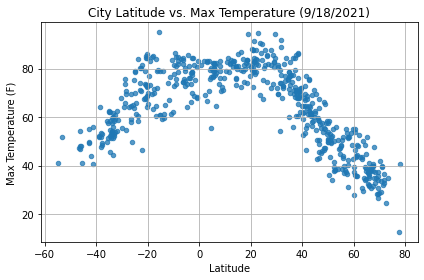

Analysis: 
The closer we are to the equator (0 degrees Latitude) the hotter it is.
We see this as the graph forms a parabolic structure, climbing and then coming back down.
This is because the earth is on a tilt and the equator is the closest point to the sun.


In [9]:
# These plots ask for current date of analysis so I'm declaring here to use throughout.
today = "(9/18/2021)"

weather_df.plot.scatter(x = 'Lat', y = 'Max Temp', grid = True, alpha = 0.75)
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (F)")
plt.title(f'City Latitude vs. Max Temperature {today}')
plt.tight_layout()
plt.show()

print('''Analysis: 
The closer we are to the equator (0 degrees Latitude) the hotter it is.
We see this as the graph forms a parabolic structure, climbing and then coming back down.
This is because the earth is on a tilt and the equator is the closest point to the sun.''')

## Latitude vs. Humidity Plot

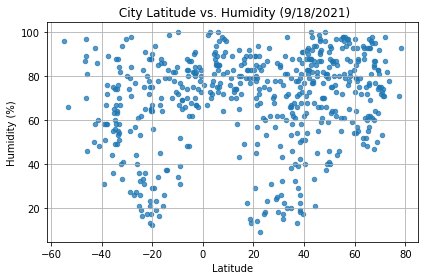

Analysis:
Nearly the full spread of diffrent humidities (from 0 to 100) occurred at every latitude
as we see points spread throughout the graph; however, it does seem that towards the extreme
latitudes (closer to the edges, -60 and 60 respectively) that the cities 
will experience higher average levels of humidity.


In [10]:
weather_df.plot.scatter(x = 'Lat', y = 'Humidity', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)") 
plt.title(f' City Latitude vs. Humidity {today}')
plt.tight_layout()
plt.show()

print('''Analysis:
Nearly the full spread of diffrent humidities (from 0 to 100) occurred at every latitude
as we see points spread throughout the graph; however, it does seem that towards the extreme
latitudes (closer to the edges, -60 and 60 respectively) that the cities 
will experience higher average levels of humidity.''')

## Latitude vs. Cloudiness Plot

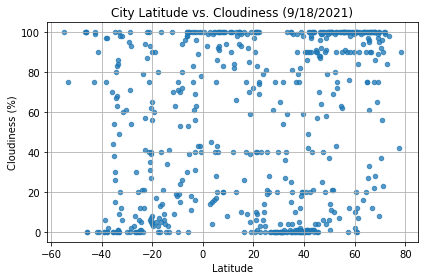

Analysis:
Latitude doesn't seem to have much of a relationship to a city's cloudiness,
This is evident as the graph has values spread throughout. 
Clusters of points at the top and bottom imply that it is cities either 
experience consistent cloudiness or none at all.
Others factors may be at play such as a city's elevation or proximity to water.


In [12]:
weather_df.plot.scatter(x = 'Lat', y = 'Cloudiness', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)") 
plt.title(f'City Latitude vs. Cloudiness {today}')
plt.tight_layout()
plt.show()

print('''Analysis:
Latitude doesn\'t seem to have much of a relationship to a city\'s cloudiness,
This is evident as the graph has values spread throughout. 
Clusters of points at the top and bottom imply that it is cities either 
experience consistent cloudiness or none at all.
Others factors may be at play such as a city\'s elevation or proximity to water.''')

## Latitude vs. Wind Speed Plot

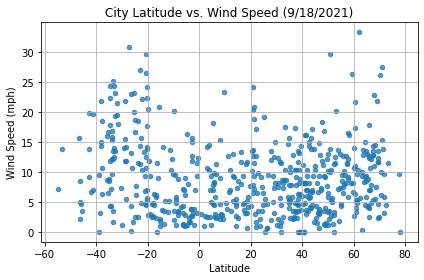

Analysis:
It would appear outside of a few potential outlier cases, 
most cities experienced average winds below 10 mph, with a heavier density below 4 mph.
As far the relationship with latitude, wind appears to be independent.
Perhaps related to elevation instead.


In [13]:
weather_df.plot.scatter(x = 'Lat', y = 'Wind Speed', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'City Latitude vs. Wind Speed {today}')
plt.tight_layout()
plt.show()

print('''Analysis:
It would appear outside of a few potential outlier cases, 
most cities experienced average winds below 10 mph, with a heavier density below 4 mph.
As far the relationship with latitude, wind appears to be independent.
Perhaps related to elevation instead.''')

## Linear Regression

In [14]:
# The rest of the problems want to be separated by the Northern or Hemisphere of the globe.
# To do this we cut off at 0 degrees latitude.
# Creating dataframes to easily pull the data into the graphs.

northern_df = weather_df[weather_df['Lat']>=0]
southern_df = weather_df[weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

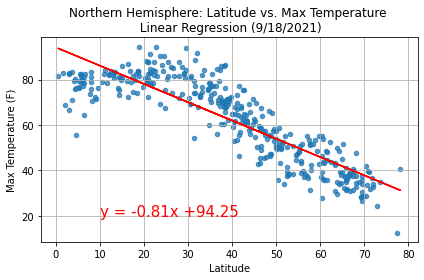

Correlation coeffecient [R-Value] is -0.87


In [17]:
# Finding the linear regression information.
(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Max Temp'])

# Creating the best fit line to be overlaid on the graph later.
fit = slope*northern_df['Lat']+intercept

# Creating the intial scatterplot.
northern_df.plot.scatter(x = 'Lat', y = 'Max Temp', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)") 
plt.title(f'Northern Hemisphere: Latitude vs. Max Temperature \n Linear Regression {today}')

# Adding the best line over the graph.
plt.plot(northern_df['Lat'], fit ,"-", color = "red")

# Overlaying the equation for the line in a clean to read manner.
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', 
[10, 20], color = 'red', fontsize = 15)

# Cleaning up the image and printing the r-value.
plt.tight_layout()
plt.show()

print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

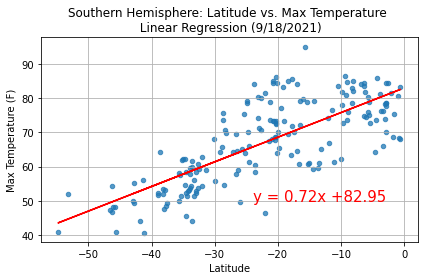

Correlation coeffecient [R-Value] is 0.76
Analysis:
Breaking into the different hemispheres, 
we can see a fairly strong correlation exists between a City's latitude and max temperature.
Both graphs had r-values with magnitudes greather than 0.7, telling us that
latitude is a strong predictor of a city's max temperature experienced, specifically
an inverse relationship in the North, direct in the South.


In [20]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Max Temp'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Max Temp', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)") 
plt.title(f'Southern Hemisphere: Latitude vs. Max Temperature \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', 
[-24, 50], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()

print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

print('''Analysis:
Breaking into the different hemispheres, 
we can see a fairly strong correlation exists between a City\'s latitude and max temperature.
Both graphs had r-values with magnitudes greather than 0.7, telling us that
latitude is a strong predictor of a city\'s max temperature experienced, specifically
an inverse relationship in the North, direct in the South.''')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

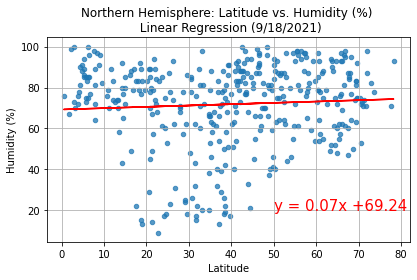

Correlation coeffecient [R-Value] is 0.06


In [21]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Humidity'])
fit = slope*northern_df['Lat']+intercept


northern_df.plot.scatter(x = 'Lat', y = 'Humidity', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'Northern Hemisphere: Latitude vs. Humidity (%) \n Linear Regression {today}')

plt.plot(northern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [50, 20], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

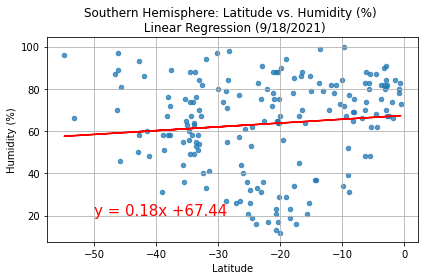

Correlation coeffecient [R-Value] is 0.11
Analysis:
Both hemispheres had similarly weak correlations (r = 0.11 and r = -0.15).
This would imply that a city's latitude does not have much impact upon it's humidity levels.
This makes sense as although temperature would contribute (something predictable by latitude),
there must be other factors such as nearby bodies of water and wind patterns?


In [22]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Humidity'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Humidity', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere: Latitude vs. Humidity (%) \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [-50, 20], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

print('''Analysis:
Both hemispheres had similarly weak correlations (r = 0.11 and r = 0.06).
This would imply that a city\'s latitude does not have much impact upon it\'s humidity levels.
This makes sense as although temperature would contribute (something predictable by latitude),
there must be other factors such as nearby bodies of water and wind patterns?''')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

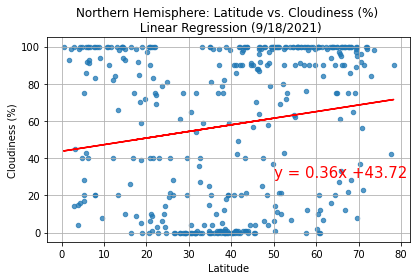

Correlation coeffecient [R-Value] is 0.17


In [25]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Cloudiness'])
fit = slope*northern_df['Lat']+intercept


northern_df.plot.scatter(x = 'Lat', y = 'Cloudiness', grid = True, alpha = 0.75) 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)") 
plt.title(f'Northern Hemisphere: Latitude vs. Cloudiness (%) \n Linear Regression {today}')

plt.plot(northern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [50, 30], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

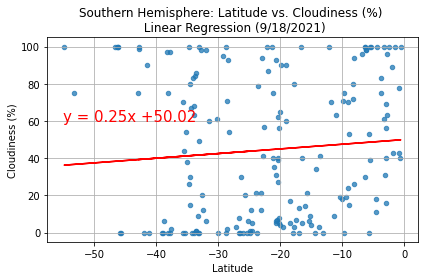

Correlation coeffecient [R-Value] is 0.09
Analysis:
Both hemispheres again experienced very weak correlations with 
r-values of 0.17 and r = 0.09 in my trials. Looking at the scatterplots most of the points
were at extreme ends of the spectrum (most points were either 0 or 100 cloudiness.
This makes me question the nuance of it's measurement and what other factors might be at play.


In [26]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Cloudiness'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Cloudiness', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)") 
plt.title(f'Southern Hemisphere: Latitude vs. Cloudiness (%) \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [-55, 60], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

print('''Analysis:
Both hemispheres again experienced very weak correlations with 
r-values of 0.17 and r = 0.09 in my trials. Looking at the scatterplots most of the points
were at extreme ends of the spectrum (most points were either 0 or 100 cloudiness.
This makes me question the nuance of it\'s measurement and what other factors might be at play.''')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

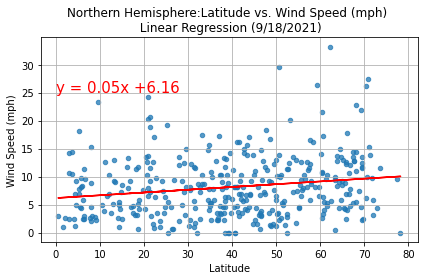

Correlation coeffecient [R-Value] is 0.18


In [29]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(northern_df['Lat'],northern_df['Wind Speed'])
fit = slope*northern_df['Lat']+intercept


northern_df.plot.scatter(x = 'Lat', y = 'Wind Speed', grid = True, alpha = 0.75) 
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.title(f'Northern Hemisphere:Latitude vs. Wind Speed (mph) \n Linear Regression {today}')

plt.plot(northern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [0, 25], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

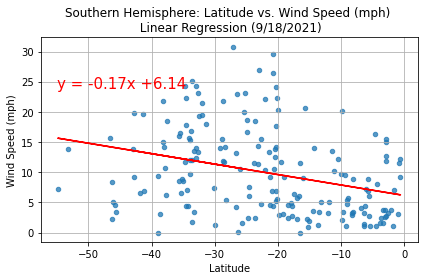

Correlation coeffecient [R-Value] is -0.31
Analysis:
These were stronger correlations than I've seen in the previous regressions. 
The southern hemisphere with it's r-value of -0.31 in this trial might
even consider latitude a 'moderate' predictor of wind speed.


In [32]:
# Refer to: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# For notes on the code. This is just a modified copy.

(slope, intercept, rvalue, _, _) = linregress(southern_df['Lat'],southern_df['Wind Speed'])
fit = slope*southern_df['Lat']+intercept


southern_df.plot.scatter(x = 'Lat', y = 'Wind Speed', grid = True, alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'Southern Hemisphere: Latitude vs. Wind Speed (mph) \n Linear Regression {today}')

plt.plot(southern_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', [-55, 24], color = 'red', fontsize = 15)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')

print('''Analysis:
These were stronger correlations than I've seen in the previous regressions. 
The southern hemisphere with it's r-value of -0.31 in this trial might
even consider latitude a \'moderate\' predictor of wind speed.''')